In [4]:
import cv2
import numpy as np
import sys
import getopt
import operator
import math
import matplotlib.pyplot as plt
import matplotlib.image as mpim

In [5]:
def findCorners(img, window_size, k, thresh):
    """
    Finds and returns list of corners and new image with corners drawn
    :param img: The original image
    :param window_size: The size (side length) of the sliding window
    :param k: Harris corner constant. Usually 0.04 - 0.06
    :param thresh: The threshold above which a corner is counted
    :return:
    """
    #Find x and y derivatives
    dy, dx = np.gradient(img)
    Ixx = dx**2
    Ixy = dy*dx
    Iyy = dy**2
    height = img.shape[0]
    width = img.shape[1]

    cornerList = []
    newImg = img.copy()
    color_img = cv2.cvtColor(newImg, cv2.COLOR_GRAY2RGB)
    offset = math.floor(window_size/2)
  
  
    # Loop through image and find our corners
    # and do non-maximum supression
    # this can be also implemented without loop
    for y in range(offset, height - offset):
        for x in range(offset, width - offset):
            # Calculate sum of squares
            Mxx = Ixx[y-offset:y + offset+1, x-offset:x + offset+1]
            Mxy = Ixy[y-offset:y + offset+1, x-offset:x+offset+1]
            Myy = Iyy[y-offset:y + offset+1, x-offset:x + offset+1]
            Mxx = Mxx.sum()
            Mxy = Mxy.sum()
            Myy = Myy.sum()

            # Find determinant and trace, use to get corner response
            det = (Mxx * Myy) - (Mxy ** 2)
            trace = Mxx + Myy
            r = det - k * (trace ** 2)

            # If corner response is over threshold, color the point and add to corner list
            if r > thresh:
                cornerList.append([x, y, r])
               
    return color_img, cornerList
    


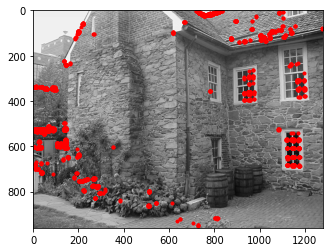

In [6]:
def main():
    
    img = cv2.imread('/content/house1.jpeg')
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # To observe the detected corners, change the threshold values such as 1000,10000,100000,1000000 .....
    finalImg, cornerList = findCorners(img, int(5), float(0.04), int(1000000000))
        
    points = np.array(cornerList) 
    plot = plt.figure(1)
    plt.imshow(img, cmap="gray")
    plt.plot(points[:,0],points[:,1], 'r.')
    plt.show()
         
    if finalImg is not None:
            cv2.imwrite("finalimage.png", finalImg)


if __name__ == "__main__":
    main()

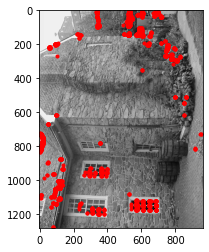

In [7]:
def main():
    
    img = cv2.imread('/content/house1-rotated.jpeg')
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    finalImg, cornerList = findCorners(img, int(5), float(0.04), int(1000000000)) 
        
    points = np.array(cornerList) 
    plot = plt.figure(1)
    plt.imshow(img, cmap="gray")
    plt.plot(points[:,0],points[:,1], 'r.')
    plt.show()
         
    if finalImg is not None:
            cv2.imwrite("finalimage.png", finalImg)


if __name__ == "__main__":
    main()

Though the image is rotated with an angle of 90 degrees, still the harris detector manages to detect the same corners.

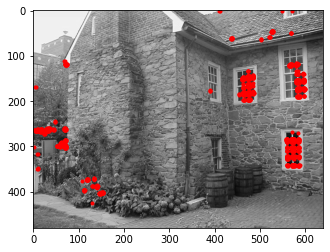

In [8]:
def main():
    
    img = cv2.imread('/content/house1-2down.jpeg')
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    finalImg, cornerList = findCorners(img, int(5), float(0.04), int(1000000000))
        
    points = np.array(cornerList) 
    plot = plt.figure(1)
    plt.imshow(img, cmap="gray")
    plt.plot(points[:,0],points[:,1], 'r.')
    plt.show()
         
    if finalImg is not None:
            cv2.imwrite("finalimage.png", finalImg)


if __name__ == "__main__":
    main()

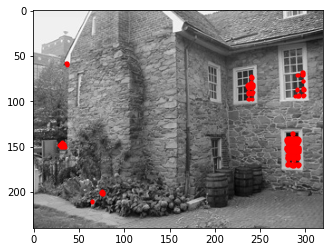

In [9]:
def main():
    
    img = cv2.imread('/content/house1-4down.jpeg')
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    finalImg, cornerList = findCorners(img, int(5), float(0.04), int(1000000000))
        
    points = np.array(cornerList) 
    plot = plt.figure(1)
    plt.imshow(img, cmap="gray")
    plt.plot(points[:,0],points[:,1], 'r.')
    plt.show()
         
    if finalImg is not None:
            cv2.imwrite("finalimage.png", finalImg)


if __name__ == "__main__":
    main()

As the image is scaled by half for each attempt, the number of the corners which are detected are reduced.  